In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('brain_tumor_cleaned.csv')

# Display the first 5 rows
print("First 5 rows:")
print(df.head())

# Print dataset information
print("\nDataset Information:")
print(df.info())



First 5 rows:
   Patient_ID  Age  Gender  Tumor_Type  Tumor_Size  Stage  \
0           1   73       1           1    5.375612      3   
1           2   26       1           0    4.847098      2   
2           3   31       1           0    5.588391      1   
3           4   29       1           1    1.436600      4   
4           5   54       0           0    2.417506      1   

   Radiation_Treatment  Surgery_Performed  Chemotherapy  Survival_Rate  ...  \
0                    0                  0             0      51.312579  ...   
1                    1                  1             1      46.373273  ...   
2                    0                  0             0      47.072221  ...   
3                    1                  0             1      51.853634  ...   
4                    0                  0             1      54.708987  ...   

   Location_Parietal  Location_Temporal  Histology_Astrocytoma  \
0                  0                  1                      1   
1           

In [83]:
# Print statistical summary for all columns
print("\nStatistical Summary:")
print(df.describe(include='all'))



Statistical Summary:
         Patient_ID           Age        Gender   Tumor_Type    Tumor_Size  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean   10000.500000     49.433700      0.499200      0.50150      5.236552   
std     5773.647028     17.389296      0.500012      0.50001      2.754359   
min        1.000000     20.000000      0.000000      0.00000      0.500410   
25%     5000.750000     34.000000      0.000000      0.00000      2.836686   
50%    10000.500000     49.000000      0.000000      1.00000      5.200675   
75%    15000.250000     65.000000      1.000000      1.00000      7.624299   
max    20000.000000     79.000000      1.000000      1.00000      9.999420   

              Stage  Radiation_Treatment  Surgery_Performed  Chemotherapy  \
count  20000.000000         20000.000000       20000.000000  20000.000000   
mean       2.495150             0.501050           0.503000      0.504850   
std        1.115992             0.500011    

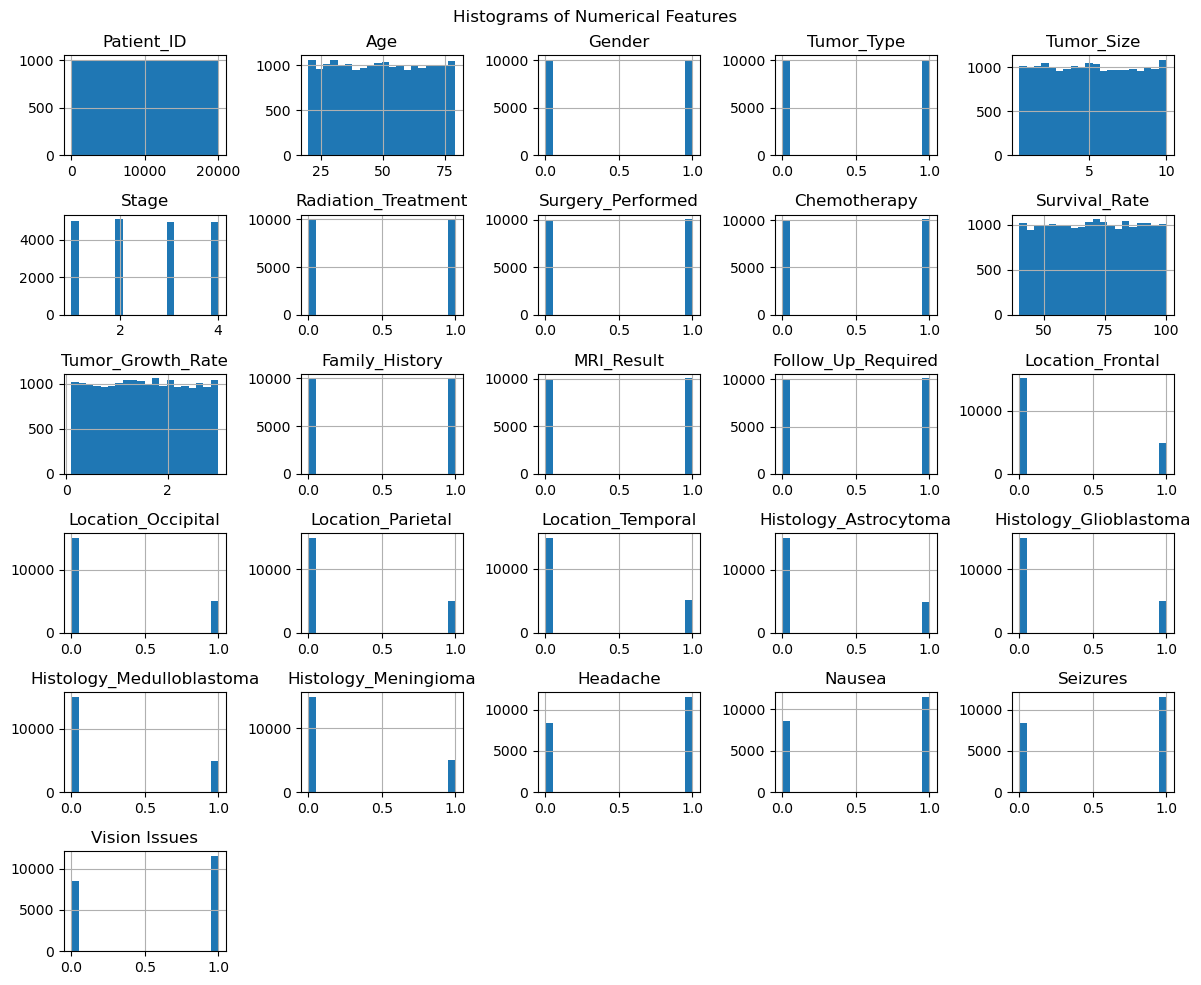

In [84]:
# Identify numerical columns and plot their histograms
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[num_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

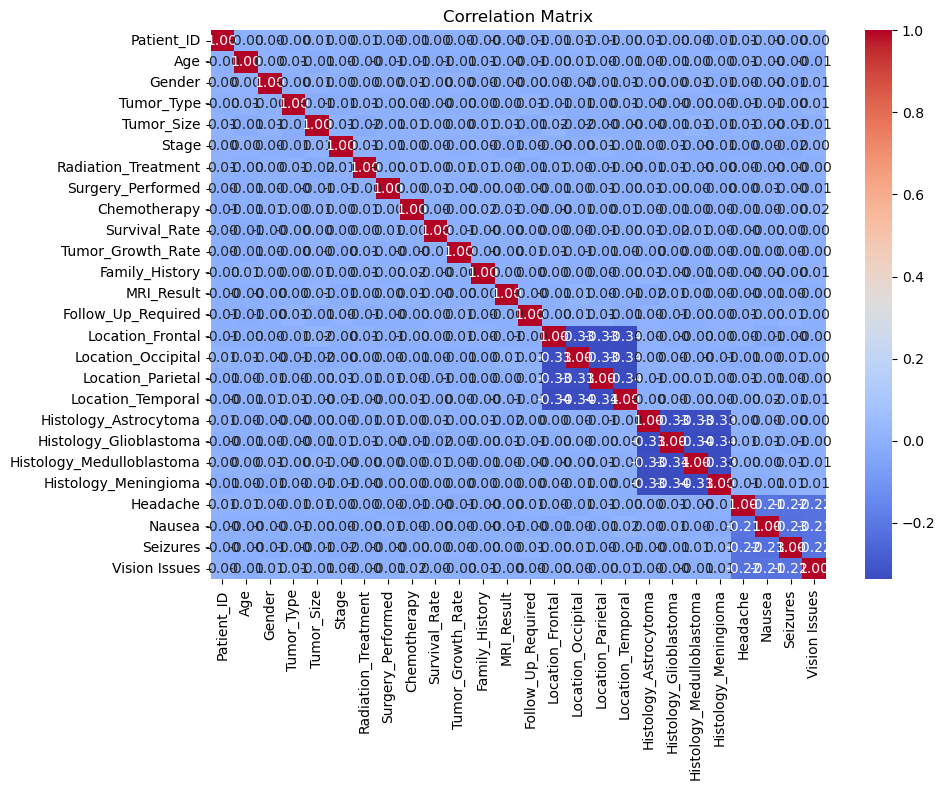

In [85]:

# Plot the correlation matrix of numerical features
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [86]:
# Drop Patient_ID if it exists
if 'Patient_ID' in df.columns:
    df.drop('Patient_ID', axis=1, inplace=True)

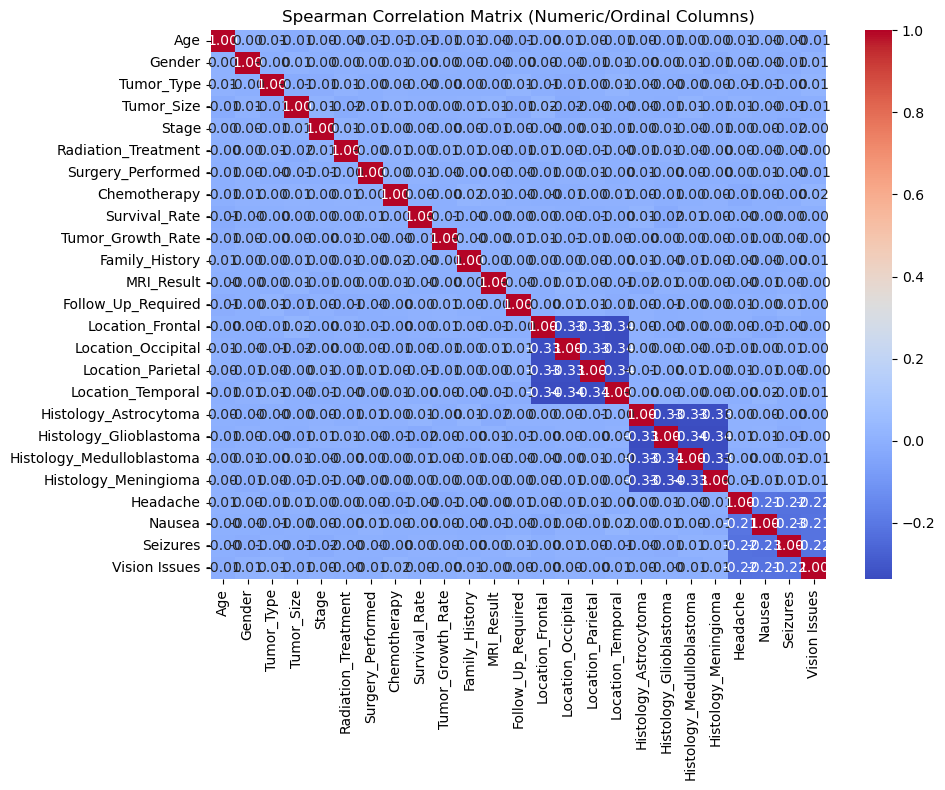

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns (including ordinal columns mapped to integers, e.g., Stage)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute Spearman correlation
corr_spearman = df[num_cols].corr(method='spearman')

# Plot the Spearman correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix (Numeric/Ordinal Columns)')
plt.tight_layout()
plt.show()

In [88]:
from itertools import combinations
from scipy.stats import chi2_contingency
import pandas as pd

# Identify binary columns (those with exactly 2 unique values)
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

# Iterate over all unique pairs of binary columns
for col1, col2 in combinations(binary_cols, 2):
    # Create a contingency table for the pair
    ct = pd.crosstab(df[col1], df[col2])
    # Perform chi-square test of independence
    chi2, p, dof, expected = chi2_contingency(ct)
    # If p-value is below 0.05, print the result and the crosstab
    if p < 0.05:
        print(f"Significant association between {col1} and {col2} (p-value = {p:.4f})")
        print("Contingency Table:")
        print(ct)
        print("-" * 50)

Significant association between Tumor_Type and Location_Temporal (p-value = 0.0487)
Contingency Table:
Location_Temporal     0     1
Tumor_Type                   
0                  7480  2490
1                  7402  2628
--------------------------------------------------
Significant association between Tumor_Type and Vision Issues (p-value = 0.0416)
Contingency Table:
Vision Issues     0     1
Tumor_Type               
0              4285  5685
1              4167  5863
--------------------------------------------------
Significant association between Chemotherapy and Family_History (p-value = 0.0236)
Contingency Table:
Family_History     0     1
Chemotherapy              
0               5033  4870
1               4969  5128
--------------------------------------------------
Significant association between Chemotherapy and Headache (p-value = 0.0416)
Contingency Table:
Headache         0     1
Chemotherapy            
0             4101  5802
1             4326  5771
---------------

# Analysis of Chi-Square Test Results:
#
## 1. Tumor Characteristics:
##    - We observed a significant association between tumor type (0 = benign, 1 = malignant) and both the temporal location and vision issues.
##      This suggests that malignant tumors may be slightly more likely to occur in the temporal region and are associated with vision problems.
##
## 2. Treatment & Symptoms:
##    - Chemotherapy shows significant associations with family history, headache, and vision issues.
##      This could mean that patients receiving chemotherapy tend to have a different profile in terms of their family history and symptoms.
##
## 3. Imaging & Histology:
##    - There is a significant link between MRI results and the presence of astrocytoma.
##      This indicates that MRI findings may help in differentiating astrocytoma cases from others.
##
## 4. One-Hot Encoded Variables:
##    - The very strong associations among the location and histology variables are expected since they come from 
##      a single categorical feature that was one-hot encoded (i.e., a tumor can only be in one location or have one histology type).
##
## 5. Symptom Clusters:
##    - The highly significant associations among the symptoms (headache, nausea, seizures, vision issues) suggest that these
##      symptoms often occur together, possibly indicating common clinical presentations.
##
## These findings provide a useful foundation for further analysis and modeling, offering both statistical validation and 
## clinical insights that could be further explored with additional visualizations or predictive models.

# ML Model

In [91]:
# List of columns that could lead to data leakage
cols_to_drop = []
if 'Patient_ID' in df.columns:
    cols_to_drop.append('Patient_ID')
if 'Survival_Rate' in df.columns:
    cols_to_drop.append('Survival_Rate')
if 'Tumor_Growth_Rate' in df.columns:
    cols_to_drop.append('Tumor_Growth_Rate')
if 'Follow_Up_Required' in df.columns:
    cols_to_drop.append('Follow_Up_Required')

# Drop these columns from the DataFrame
df.drop(columns=cols_to_drop, inplace=True)
print("Dropped columns to avoid leakage:", cols_to_drop)

Dropped columns to avoid leakage: ['Survival_Rate', 'Tumor_Growth_Rate', 'Follow_Up_Required']


In [92]:
# Define the target variable (Tumor_Type: 1 = malignant, 0 = benign)
target = 'Tumor_Type'
X = df.drop(target, axis=1)  # All columns except the target
y = df[target]

In [93]:
# Identify numerical features and any remaining categorical features
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", num_cols)
print("Categorical Features:", cat_cols)

Numerical Features: ['Age', 'Gender', 'Tumor_Size', 'Stage', 'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy', 'Family_History', 'MRI_Result', 'Location_Frontal', 'Location_Occipital', 'Location_Parietal', 'Location_Temporal', 'Histology_Astrocytoma', 'Histology_Glioblastoma', 'Histology_Medulloblastoma', 'Histology_Meningioma', 'Headache', 'Nausea', 'Seizures', 'Vision Issues']
Categorical Features: []


In [94]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Build a preprocessor: scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Create a full pipeline with the preprocessor and a RandomForest classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [96]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Gender',
                                                   'Tumor_Size', 'Stage',
                                                   'Radiation_Treatment',
                                                   'Surgery_Performed',
                                                   'Chemotherapy',
                                                   'Family_History',
                                                   'MRI_Result',
                                                   'Location_Frontal',
                                                   'Location_Occipital',
                                                   'Location_Parietal',
                                                   'Location_Temporal',
                                                   'Histology_Astrocytoma',
                                                   'Histology_Glioblastoma',
                                                   'Histology_Medulloblastoma',
                                                   'Histology_Meningioma',
                                                   'Headache', 'Nausea',
                                                   'Seizures',
                                                   'Vision Issues']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [98]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print the test set accuracy and classification report
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Set Accuracy: 0.50075

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1997
           1       0.50      0.50      0.50      2003

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.50      0.50      4000



In [99]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters for the RandomForest classifier
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20]
}

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best cross-validation accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best CV Accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the tuned model on the test set
y_pred_tuned = grid_search.predict(X_test)
print("\nTest Accuracy after tuning:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report after tuning:")
print(classification_report(y_test, y_pred_tuned))

Best parameters found: {'classifier__max_depth': 10, 'classifier__n_estimators': 150}
Best CV Accuracy: 0.51

Test Accuracy after tuning: 0.50775

Classification Report after tuning:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1997
           1       0.51      0.53      0.52      2003

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.51      0.51      0.51      4000



In [118]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions for the RandomForest classifier
param_dist = {
    'classifier__n_estimators': randint(50, 200),  # Randomly choose between 50 and 200 trees
    'classifier__max_depth': [None] + list(range(5, 31))  # None or any value from 5 to 30
}

# Set up RandomizedSearchCV with 20 iterations and 5-fold cross-validation
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist, 
    n_iter=20, 
    cv=5, 
    scoring='accuracy', 
    random_state=42, 
    n_jobs=-1  # Use all available cores for speed
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Print the best parameters and cross-validation accuracy
print("Best parameters found:", random_search.best_params_)
print("Best CV Accuracy: {:.2f}".format(random_search.best_score_))

# Evaluate the best model from RandomizedSearchCV on the test set
from sklearn.metrics import accuracy_score, classification_report

y_pred_random = random_search.predict(X_test)
print("Test Accuracy after tuning:", accuracy_score(y_test, y_pred_random))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_random))

Best parameters found: {'classifier__max_depth': 20, 'classifier__n_estimators': 108}
Best CV Accuracy: 0.51
Test Accuracy after tuning: 0.4965

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1997
           1       0.50      0.50      0.50      2003

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.50      0.50      4000



# Analysis of Random Forest Classifier Results:
#
# Our Random Forest classifier, even after tuning (best parameters: max_depth=10, n_estimators=150), is only achieving around 50-51% accuracy.
# This is essentially equivalent to random guessing in a balanced dataset (about 50/50 benign vs. malignant tumors).
#
# The classification report shows that both classes have precision, recall, and F1-scores close to 0.5.
#
# What does this mean?
# - The features currently available in the dataset may not be strong predictors of tumor type (benign vs. malignant).
# - The model isn’t capturing any meaningful patterns to distinguish between the classes.
#
# Possible next steps:
# 1. Revisit Feature Engineering:
#    - Examine if additional features or interactions between existing features could be created.
#    - Explore domain-specific transformations that might enhance the predictive power.
#
# 2. Explore Alternative Models:
#    - Try models that can capture non-linear relationships better, such as gradient boosting or neural networks.
#
# 3. Evaluate Data Quality:
#    - Double-check preprocessing and cleaning to ensure valuable information hasn’t been lost.
#    - Consider gathering more data or external data sources if available.
#
# In summary, the performance near 50% accuracy indicates that our current feature set isn’t providing a strong signal
# for differentiating benign from malignant tumors. We need to either improve our features or consider more sophisticated models.

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Build a preprocessor for numerical and categorical features (assuming num_cols & cat_cols have already been defined)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Create the full pipeline with Logistic Regression (using a higher max_iter for convergence)
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

In [122]:
# Train the logistic regression pipeline on the training data
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Gender',
                                                   'Tumor_Size', 'Stage',
                                                   'Radiation_Treatment',
                                                   'Surgery_Performed',
                                                   'Chemotherapy',
                                                   'Family_History',
                                                   'MRI_Result',
                                                   'Location_Frontal',
                                                   'Location_Occipital',
                                                   'Location_Parietal',
                                                   'Location_Temporal',
                                                   'Histology_Astrocytoma',
                                                   'Histology_Glioblastoma',
                                                   'Histology_Medulloblastoma',
                                                   'Histology_Meningioma',
                                                   'Headache', 'Nausea',
                                                   'Seizures',
                                                   'Vision Issues']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [124]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set using logistic regression
y_pred_logistic = logistic_pipeline.predict(X_test)

# Evaluate performance
print("Logistic Regression Test Set Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Test Set Accuracy: 0.50925

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.51      0.47      0.49      1997
           1       0.51      0.55      0.53      2003

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.51      0.51      0.51      4000



In [126]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for logistic regression (using different regularization strengths)
param_grid_logistic = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2']  # You can try 'l1' with an appropriate solver if desired
}

# Set up GridSearchCV for logistic regression with 5-fold cross-validation
logistic_grid_search = GridSearchCV(logistic_pipeline, param_grid_logistic, cv=5, scoring='accuracy', n_jobs=-1)
logistic_grid_search.fit(X_train, y_train)

# Print the best parameters and cross-validation accuracy
print("Best parameters for Logistic Regression:", logistic_grid_search.best_params_)
print("Best CV Accuracy:", logistic_grid_search.best_score_)

# Evaluate the tuned logistic regression model on the test set
y_pred_logistic_tuned = logistic_grid_search.predict(X_test)
print("Tuned Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_logistic_tuned))
print("\nClassification Report for Tuned Logistic Regression:")
print(classification_report(y_test, y_pred_logistic_tuned))

Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Best CV Accuracy: 0.49837499999999996
Tuned Logistic Regression Test Accuracy: 0.50925

Classification Report for Tuned Logistic Regression:
              precision    recall  f1-score   support

           0       0.51      0.47      0.49      1997
           1       0.51      0.55      0.53      2003

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.51      0.51      0.51      4000



# Analysis of Logistic Regression Results:
#
# Our logistic regression model achieved about 51% accuracy, which is almost the same as random guessing.
# In our balanced dataset (roughly half benign and half malignant tumors), this means the model isn’t able
# to tell the difference between the two classes very well.
#
# For benign tumors (class 0), we see a precision of around 0.51 and recall of about 0.47.
# For malignant tumors (class 1), the precision is also around 0.51, with a slightly better recall of 0.55.
# Overall, the F1-scores are roughly 0.5, which confirms that the model isn’t picking up a strong signal.
#
# We also tuned the model and found that using a regularization strength (C) of 0.1 with L2 penalty did not
# really improve performance—it still remains near 51%.
#
# This result suggests a few possibilities:
#
# 1. The features we are currently using might not be very good at predicting whether a tumor is malignant or benign.
#    There may be important predictive signals missing or hidden in the data.
#
# 2. We might need to do more feature engineering, such as creating new features or combining existing ones,
#    to better capture the patterns in the data.
#
# 3. It’s also possible that logistic regression, which is a relatively simple linear model, isn’t powerful enough
#    to capture complex relationships in the data. We could explore more advanced models like Gradient Boosting Machines
#    or Neural Networks.
#
# Next Steps:
#
# - Revisit the feature engineering process to see if we can extract or create more informative features.
# - Double-check our data quality and preprocessing steps to ensure that we haven’t inadvertently removed
#   useful information.
# - Experiment with alternative models that can capture non-linear relationships and see if they offer improved performance.
#
# In summary, our logistic regression model isn’t performing much better than chance,
# which indicates we need to improve our features or try a different modeling approach to get better predictions.